In [ ]:
# Instalación de mlxtend
!pip install mlxtend

# Importación de librerías necesarias
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Ruta del archivo en tu Google Drive
file_path = '/content/drive/My Drive/EXPO_ENE_AGO_2024_limpio.csv'

# Cargar el archivo CSV
dataset = pd.read_csv(file_path, sep=';')
dataset.head()
#dataset.info()
selected_columns = ['DESPAIS', 'FLUJO','CLTNT','DESTNT', 'DESACT2', 'KILNET','KILBRU', 'VALOR']  # Ajusta según lo que sea relevante para tu análisis

df_filtered= dataset[selected_columns].dropna().drop_duplicates()
print(df_filtered[['KILBRU', 'VALOR']].std())
output_path = '/content/drive/My Drive/dataset_filtrado.csv'
df_filtered.to_csv(output_path, index=False, encoding='utf-8')

print(f"Archivo guardado en: {output_path}")



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
KILBRU    6.908180e+06
VALOR     3.158446e+06
dtype: float64
Archivo guardado en: /content/drive/My Drive/dataset_filtrado.csv


In [ ]:
# 1. Eliminar duplicados
df_cleaned = dataset.drop_duplicates()

# 2. Reemplazar valores faltantes por la mediana para las columnas numéricas y "desconocido" para las columnas de texto
for column in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    df_cleaned[column].fillna(df_cleaned[column].median(), inplace=True)

for column in df_cleaned.select_dtypes(include=['object']).columns:
    df_cleaned[column].fillna("desconocido", inplace=True)

# 3. Verificar caracteres no ASCII y corregir, pero conservar la "ñ"
def clean_text(text):
    if isinstance(text, str):
        # Usamos expresiones regulares para eliminar solo caracteres no deseados, preservando la "ñ"
        # Reemplazar caracteres no ASCII (excepto ñ) por un espacio vacío o dejar tal cual
        text = ''.join([char if ord(char) < 128 or char == 'ñ' else ' ' for char in text])  # Mantener ñ y eliminar otros no ASCII
    return text

# Aplicar la limpieza solo a las columnas de tipo texto
df_cleaned = df_cleaned.applymap(clean_text)

# 4. Reemplazar caracteres no deseados
df_cleaned = df_cleaned.replace({
    r'±': 'ñ',  # Reemplazar ± por ñ
    r'""': '',    # Eliminar comillas dobles
    r',': ' ó ',  # Reemplazar coma por ó
    r'-': ' ó ',  # Reemplazar guion por ó
    r'/': ' ó ',  # Reemplazar barra por ó
    r'\.': ' ó ',  # Reemplazar punto por ó
    r'¢': ' ó ',   # Reemplazar símbolo de moneda por ó
    r'==': 'i'     # Reemplazar == por 'i'
}, regex=True)

# 5. Verificar y corregir valores corruptos
# Aquí verificamos si alguna columna tiene datos que claramente no deberían existir (e.g., valores muy altos o negativos inusuales)
# Esto se hará de manera general para los valores numéricos
# Reemplazar los valores negativos por la mediana de la columna correspondiente
for column in ['KILBRU', 'KILNET', 'VALOR','FINO']:
    median_value = df_cleaned[column].median()
    df_cleaned[column] = df_cleaned[column].apply(lambda x: median_value if x < 0 else x)

df_cleaned.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-35-4058056c7e0c>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[column].fillna(df_cleaned[column].median(), inplace=True)
<ipython-input-35-4058056c7

,ADUDES,DESADU,GESTION,MES,FLUJO,NANDINA,DESNAN,CAP,DESCAP,SECC,...,CLACT,CODACT2,DESACT2,TNT,DESTNT,CLTNT,KILBRU,KILNET,FINO,VALOR
0,211,aeropuerto el alto,2024,1,1 exportaciones,1212991000,caña de azucar,12,semillas y frutos oleaginosos semillas y frut...,2,...,1agricultura ganaderia caza silvicultura y pesca,11,otros productos agropecuarios,34,otros productos,3no tradicionales,1620.5,1545.0,0.0,47416.05
1,211,aeropuerto el alto,2024,1,1 exportaciones,1801001900,el demas cacao en grano entero crudo,18,cacao y sus preparados,4,...,1agricultura ganaderia caza silvicultura y pesca,3,cacao en grano,11,cacao,3no tradicionales,114.0,105.0,0.0,961.80
2,211,aeropuerto el alto,2024,1,1 exportaciones,1803100000,pasta de cacao sin desgrasar,18,cacao y sus preparados,4,...,4industria manufacturera,1,cacao,11,cacao,3no tradicionales,54.0,50.0,0.0,576.50
3,211,aeropuerto el alto,2024,1,1 exportaciones,1805000000,cacao en polvo sin adicion de azucar u otro ed...,18,cacao y sus preparados,4,...,4industria manufacturera,1,cacao,11,cacao,3no tradicionales,56.0,50.0,0.0,411.50
4,211,aeropuerto el alto,2024,1,1 exportaciones,1805000000,cacao en polvo sin adicion de azucar u otro ed...,18,cacao y sus preparados,4,...,4industria manufacturera,1,cacao,11,cacao,3no tradicionales,27.0,25.0,0.0,150.00


In [ ]:
df_cleaned=dataset.copy()
for column in ['KILBRU', 'KILNET', 'VALOR','FINO']:
    median_value = df_cleaned[column].median()
    df_cleaned[column] = df_cleaned[column].apply(lambda x: median_value if x < 0 else x)

df_cleaned.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ADUDES,DESADU,GESTION,MES,FLUJO,NANDINA,DESNAN,CAP,DESCAP,SECC,...,CLACT,CODACT2,DESACT2,TNT,DESTNT,CLTNT,KILBRU,KILNET,FINO,VALOR
0,211,aeropuerto el alto,2024,1,1 exportaciones,1212991000,caña de azucar,12,semillas y frutos oleaginosos semillas y frut...,2,...,1agricultura ganaderia caza silvicultura y pesca,11,otros productos agropecuarios,34,otros productos,3no tradicionales,1620.5,1545.0,0.0,47416.05
1,211,aeropuerto el alto,2024,1,1 exportaciones,1801001900,el demas cacao en grano entero crudo,18,cacao y sus preparados,4,...,1agricultura ganaderia caza silvicultura y pesca,3,cacao en grano,11,cacao,3no tradicionales,114.0,105.0,0.0,961.80
2,211,aeropuerto el alto,2024,1,1 exportaciones,1803100000,pasta de cacao sin desgrasar,18,cacao y sus preparados,4,...,4industria manufacturera,1,cacao,11,cacao,3no tradicionales,54.0,50.0,0.0,576.50
3,211,aeropuerto el alto,2024,1,1 exportaciones,1805000000,cacao en polvo sin adicion de azucar u otro ed...,18,cacao y sus preparados,4,...,4industria manufacturera,1,cacao,11,cacao,3no tradicionales,56.0,50.0,0.0,411.50
4,211,aeropuerto el alto,2024,1,1 exportaciones,1805000000,cacao en polvo sin adicion de azucar u otro ed...,18,cacao y sus preparados,4,...,4industria manufacturera,1,cacao,11,cacao,3no tradicionales,27.0,25.0,0.0,150.00


In [ ]:
# Verificar valores faltantes en el dataset
missing_values = df_cleaned.isnull().sum()

# Verificar caracteres no reconocidos en las primeras filas
df_cleaned.columns, df_cleaned.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(Index(['ADUDES', 'DESADU', 'GESTION', 'MES', 'FLUJO', 'NANDINA', 'DESNAN',
        'CAP', 'DESCAP', 'SECC', 'DESSEC', 'PAIS', 'DESPAIS', 'AREA', 'DESAREA',
        'OTROS', 'MEDI', 'DESMEDI', 'VIASAL', 'DESVIA', 'DEPART', 'DESDEP',
        'CUCI3', 'DESCUCI3', 'GCE3', 'DESGCE3', 'CIIUR3', 'DESCIIU3', 'CLACT',
        'CODACT2', 'DESACT2', 'TNT', 'DESTNT', 'CLTNT', 'KILBRU', 'KILNET',
        'FINO', 'VALOR'],
       dtype='object'),
    ADUDES              DESADU  GESTION  MES            FLUJO     NANDINA  \
 0     211  aeropuerto el alto     2024    1  1 exportaciones  1212991000   
 1     211  aeropuerto el alto     2024    1  1 exportaciones  1801001900   
 2     211  aeropuerto el alto     2024    1  1 exportaciones  1803100000   
 3     211  aeropuerto el alto     2024    1  1 exportaciones  1805000000   
 4     211  aeropuerto el alto     2024    1  1 exportaciones  1805000000   
 
                                               DESNAN  CAP  \
 0                                  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-37-240ac68730e5>:12: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = numeric_cols.apply(lambda x: skew(x.dropna()))  # Excluimos los valores nulos


Asimetría de las columnas:
ADUDES      0.317990
GESTION          NaN
MES        -0.121698
NANDINA     0.251514
CAP         0.247990
SECC        0.392516
PAIS        0.714555
AREA        0.602026
MEDI       -1.061191
VIASAL      0.783112
DEPART      0.078300
CUCI3      -0.034615
GCE3        1.005797
CIIUR3     -0.037481
CODACT2     4.102791
TNT        -1.043788
KILBRU     19.367891
KILNET     19.771584
FINO       23.125974
VALOR      10.629474
dtype: float64

Columnas con asimetría positiva que probablemente necesitan transformación logarítmica: Index(['PAIS', 'AREA', 'VIASAL', 'GCE3', 'CODACT2', 'KILBRU', 'KILNET', 'FINO',
       'VALOR'],
      dtype='object')


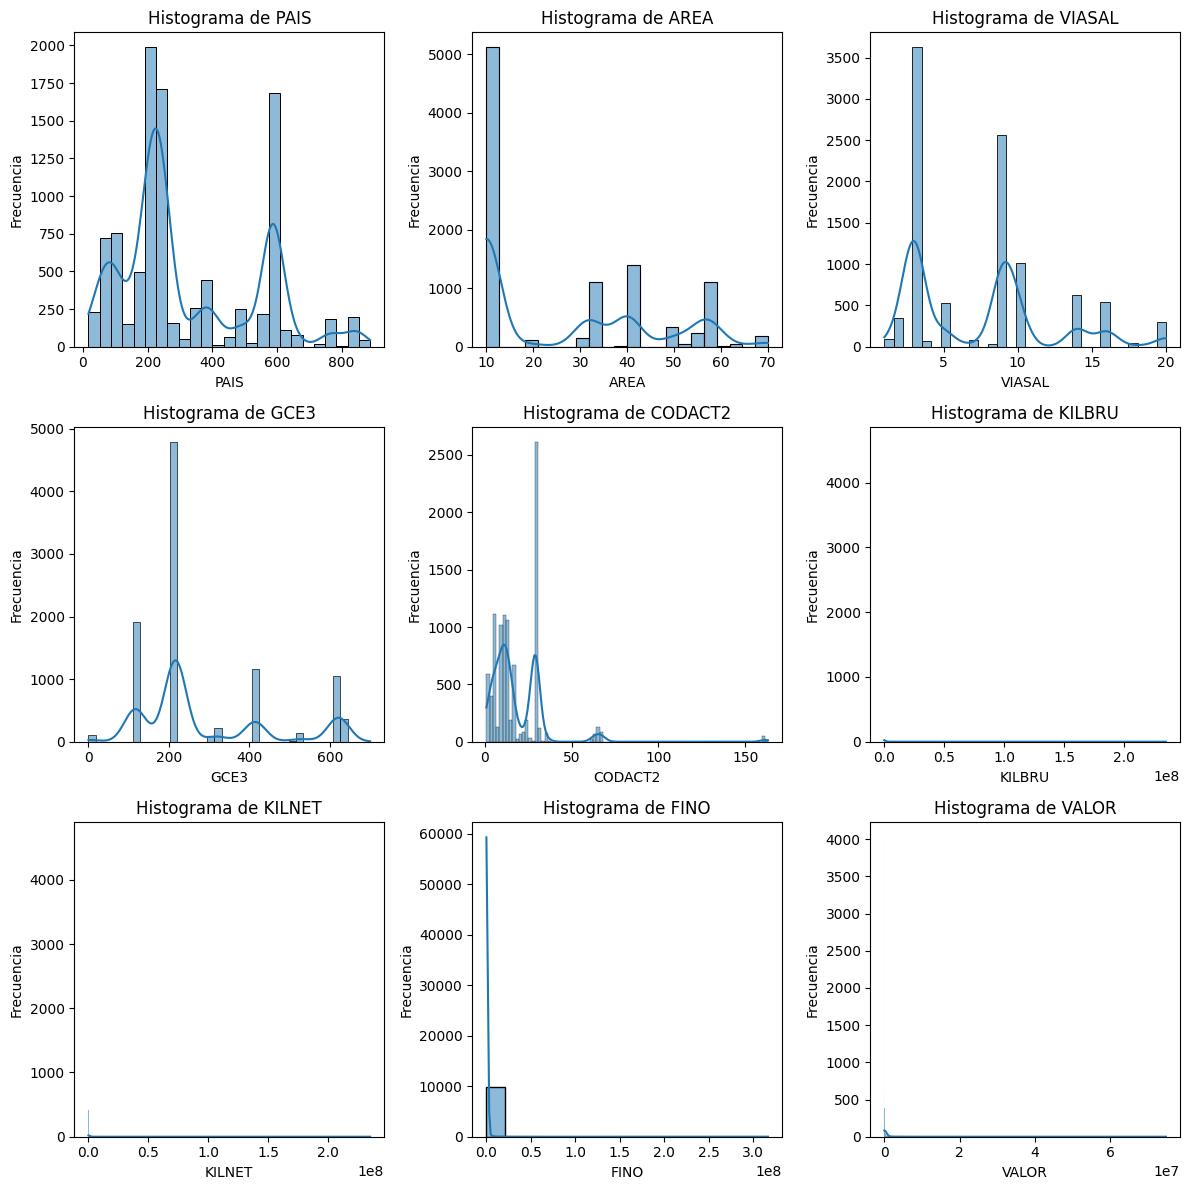

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import numpy as np # Importing numpy library

# Suponiendo que tienes el dataframe df
# Seleccionamos solo las columnas numéricas
numeric_cols = df_cleaned.select_dtypes(include=[np.number])

# Calcular el coeficiente de asimetría para cada columna
skewness = numeric_cols.apply(lambda x: skew(x.dropna()))  # Excluimos los valores nulos
print("Asimetría de las columnas:")
print(skewness)

# Determinar qué columnas necesitan transformación logarítmica (asimetría > 0.5)
cols_to_transform = skewness[skewness > 0.5].index
print(f"\nColumnas con asimetría positiva que probablemente necesitan transformación logarítmica: {cols_to_transform}")

# Graficar histogramas para visualización
num_plots = len(cols_to_transform)  # Número de gráficos necesarios
ncols = 3  # Número de columnas en la cuadrícula
nrows = (num_plots // ncols) + (num_plots % ncols > 0)  # Calcular filas necesarias

plt.figure(figsize=(12, 4 * nrows))  # Ajustar el tamaño de la figura según el número de filas

for i, col in enumerate(cols_to_transform):
    plt.subplot(nrows, ncols, i + 1)  # Crear subgráficos dinámicamente
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()



In [ ]:
from scipy.stats import zscore
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Calcular el Z-score de cada valor
z_scores = np.abs(zscore(df_cleaned[['KILBRU', 'KILNET', 'VALOR', 'FINO']]))

# Identificar outliers: puntos cuyo Z-score es mayor que 3
outliers = (z_scores > 3)

# Transformar solo los outliers (log1p) using .applymap()
df_transformed = df_cleaned.copy()
df_cleaned[['KILBRU', 'KILNET', 'VALOR', 'FINO']] = df_cleaned[['KILBRU', 'KILNET', 'VALOR', 'FINO']].applymap(lambda x: np.log1p(x) if outliers.any().any() and isinstance(x,(int,float)) else x)


# Ver los resultados
df_cleaned.head()

# Seleccionar solo las columnas numéricas relevantes para la normalización
columns_to_normalize = ['KILBRU', 'VALOR', 'KILNET','FINO']  # Ajusta las columnas si es necesario

scaler = StandardScaler()
df_cleaned[columns_to_normalize] = scaler.fit_transform(df_cleaned[columns_to_normalize])

# Ver los resultados normalizados
print(df_cleaned[columns_to_normalize].head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-48-5d7c292507f6>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned[['KILBRU', 'KILNET', 'VALOR', 'FINO']] = df_cleaned[['KILBRU', 'KILNET', 'VALOR', 'FINO']].applymap(lambda x: np.log1p(x) if outliers.any().any() and isinstance(x,(int,float)) else x)


     KILBRU     VALOR    KILNET      FINO
0 -0.239544  0.325435 -0.215224 -0.389572
1 -0.902911 -0.953191 -0.887052 -0.389572
2 -1.087819 -1.120902 -1.070456 -0.389572
3 -1.078864 -1.231304 -1.070456 -0.389572
4 -1.257066 -1.561044 -1.239348 -0.389572


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


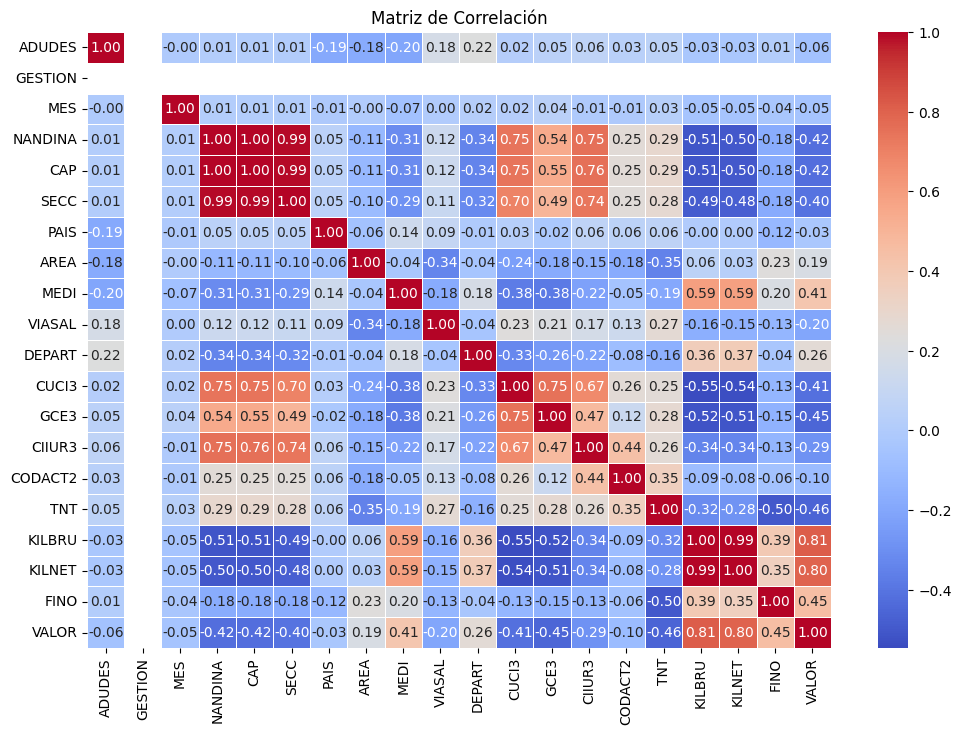

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas para el análisis de correlación
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlación
correlation_matrix = df_cleaned[numeric_columns].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

In [ ]:
# Identificar las columnas con alta correlación con 'VALOR'
correlation_with_valor = correlation_matrix['VALOR'].sort_values(ascending=False)

# Mostrar las columnas más correlacionadas con 'VALOR'
correlation_with_valor.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,VALOR
VALOR,1.000000
KILBRU,0.813823
KILNET,0.795076
FINO,0.453490
MEDI,0.408369


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


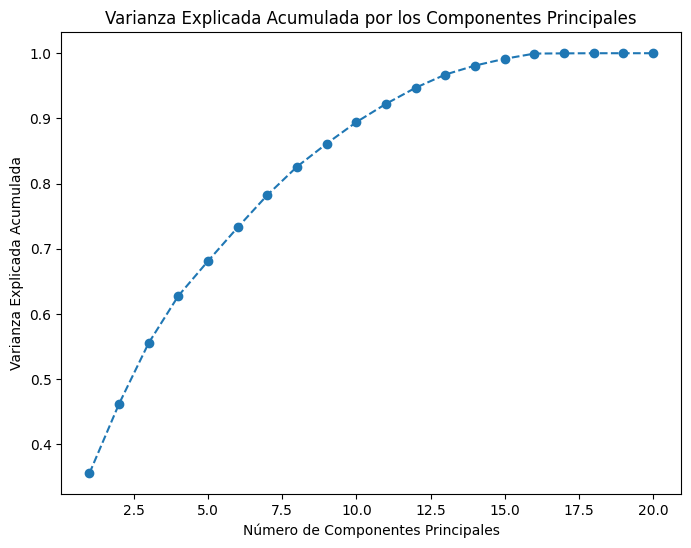

array([3.55735229e-01, 1.06636969e-01, 9.34380535e-02, 7.22249064e-02,
       5.33516329e-02, 5.15727999e-02, 4.96324130e-02, 4.34844409e-02,
       3.53794384e-02, 3.29695407e-02, 2.80226083e-02, 2.47254721e-02,
       2.01479926e-02, 1.37854105e-02, 1.03637465e-02, 7.98086888e-03,
       3.35301120e-04, 2.12550399e-04, 6.26451074e-07, 1.57792460e-17])

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos (es importante para PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned[numeric_columns])

# Aplicar PCA
pca = PCA()
pca.fit(scaled_data)

# Variancia explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Graficar la varianza explicada acumulada
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title("Varianza Explicada Acumulada por los Componentes Principales")
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Explicada Acumulada")
plt.show()

# Ver los componentes principales
explained_variance

In [ ]:
# Seleccionar las columnas relevantes basadas en PCA
# Vamos a elegir las columnas con mayor varianza explicada (las que contribuyen más a los primeros componentes principales)

# Determinar las columnas más relevantes según la varianza explicada acumulada
num_components = 10# Seleccionamos los primeros dos componentes que explican la mayor parte de la varianza

# Seleccionamos las columnas cuyas contribuciones a los primeros componentes son más altas
important_columns = numeric_columns[:num_components]

# Ver las columnas seleccionadas
important_columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['ADUDES', 'GESTION', 'MES', 'NANDINA', 'CAP', 'SECC', 'PAIS', 'AREA',
       'MEDI', 'VIASAL'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# 1. Selección de columnas relevantes para la clusterización
selected_columns = ['DESPAIS', 'FLUJO','CLTNT','DESTNT', 'DESACT2', 'KILNET','KILBRU', 'VALOR']  # Ajusta según lo que sea relevante para tu análisis
df_filtered= df_cleaned[selected_columns].dropna().drop_duplicates()

# Seleccionar solo las columnas numéricas relevantes para la normalización
columns_to_normalize = ['KILBRU', 'VALOR', 'KILNET']  # Ajusta las columnas si es necesario


# Ver los resultados normalizados
print(df_filtered[columns_to_normalize].head())

     KILBRU     VALOR    KILNET
0 -0.239544  0.325435 -0.215224
1 -0.902911 -0.953191 -0.887052
2 -1.087819 -1.120902 -1.070456
3 -1.078864 -1.231304 -1.070456
4 -1.257066 -1.561044 -1.239348


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Verificar la media y desviación estándar después de la normalización
print("Media después de la normalización:", df_filtered[['KILBRU', 'VALOR', 'KILNET']].mean())
print("Desviación estándar después de la normalización:", df_filtered[['KILBRU', 'VALOR', 'KILNET']].std())


Media después de la normalización: KILBRU   -0.004362
VALOR     0.002401
KILNET   -0.004852
dtype: float64
Desviación estándar después de la normalización: KILBRU    1.001798
VALOR     1.002389
KILNET    1.001572
dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


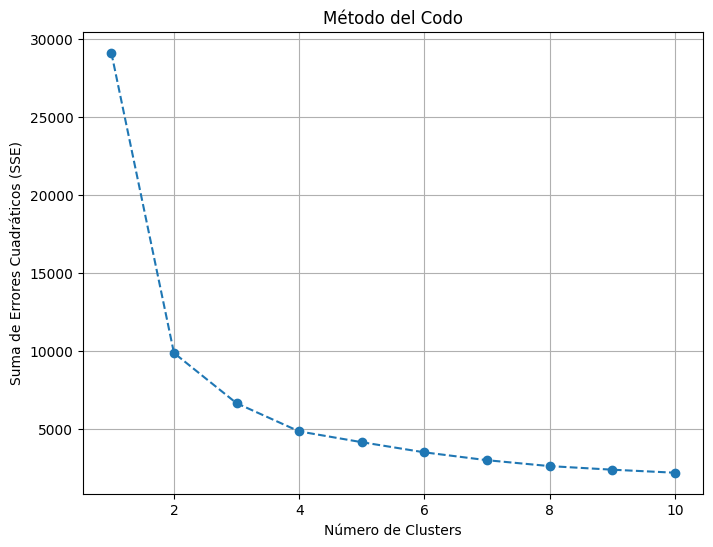

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
X_cluster = df_filtered[['KILBRU', 'KILNET', 'VALOR']]

# Aplicar el método del codo para encontrar el número óptimo de clusters
sse = []
for k in range(1, 11):  # Probar con 1 hasta 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    sse.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.title("Método del Codo")
plt.xlabel("Número de Clusters")
plt.ylabel("Suma de Errores Cuadráticos (SSE)")
plt.grid(True)
plt.show()

In [ ]:

# Verificar la media y desviación estándar de las columnas numéricas
print("Media de las columnas:")
print(df_filtered[['KILBRU', 'VALOR']].mean())

print("\nDesviación estándar de las columnas:")


Media de las columnas:
KILBRU   -0.004362
VALOR     0.002401
dtype: float64

Desviación estándar de las columnas:
KILBRU    1.001798
VALOR     1.002389
dtype: float64
Archivo guardado en: /content/drive/My Drive/dataset_filtrado.csv


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


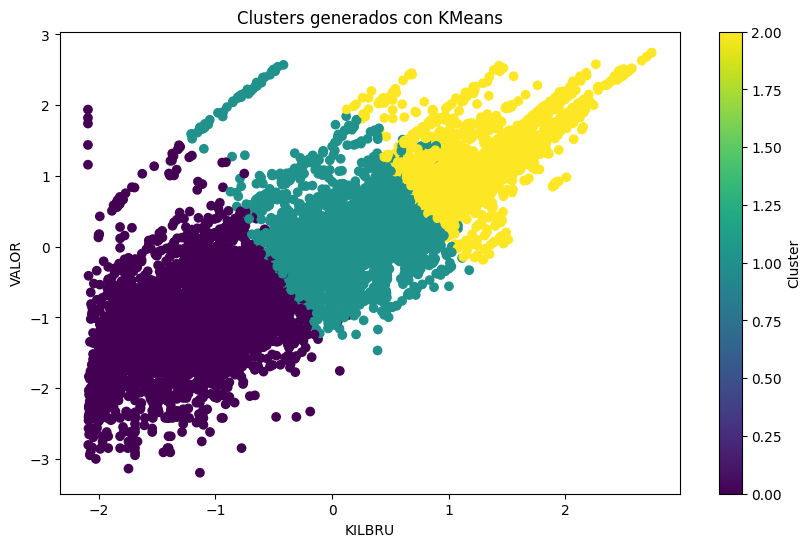

In [ ]:

# Aplicar el modelo K-means con 3 clusters (puedes ajustar este número si lo deseas)
kmeans = KMeans(n_clusters=3, random_state=42)
df_filtered['Cluster'] = kmeans.fit_predict(X_cluster)

# Visualizar el resultado de los clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['KILBRU'], df_filtered['VALOR'], c=df_filtered['Cluster'], cmap='viridis')
plt.xlabel('KILBRU')
plt.ylabel('VALOR')
plt.title('Clusters generados con KMeans')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
df_filtered.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,DESPAIS,FLUJO,CLTNT,DESTNT,DESACT2,KILNET,KILBRU,VALOR,Cluster
0,brasil,1 exportaciones,3no tradicionales,otros productos,otros productos agropecuarios,-0.215224,-0.239544,0.325435,1
1,china,1 exportaciones,3no tradicionales,cacao,cacao en grano,-0.887052,-0.902911,-0.953191,0
2,china,1 exportaciones,3no tradicionales,cacao,cacao,-1.070456,-1.087819,-1.120902,0
3,china,1 exportaciones,3no tradicionales,cacao,cacao,-1.070456,-1.078864,-1.231304,0
4,japon,1 exportaciones,3no tradicionales,cacao,cacao,-1.239348,-1.257066,-1.561044,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


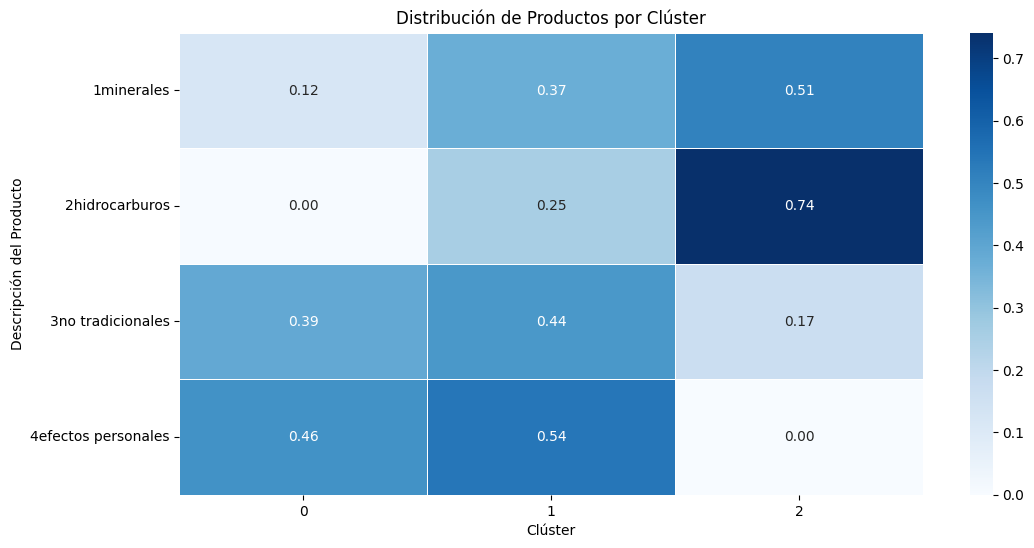

In [ ]:
# 1. Análisis de la distribución de características cualitativas por clúster
# Usar la columna 'Cluster' para agrupar las características cualitativas

# Analizar la distribución de los productos (DESNAN) por clúster
product_distribution = pd.crosstab(df_filtered['CLTNT'], df_filtered['Cluster'])
product_distribution = product_distribution.div(product_distribution.sum(axis=1), axis=0)  # Normalizar por fila

# Visualizar la distribución de productos por clúster
plt.figure(figsize=(12, 6))
sns.heatmap(product_distribution, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Distribución de Productos por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Descripción del Producto')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


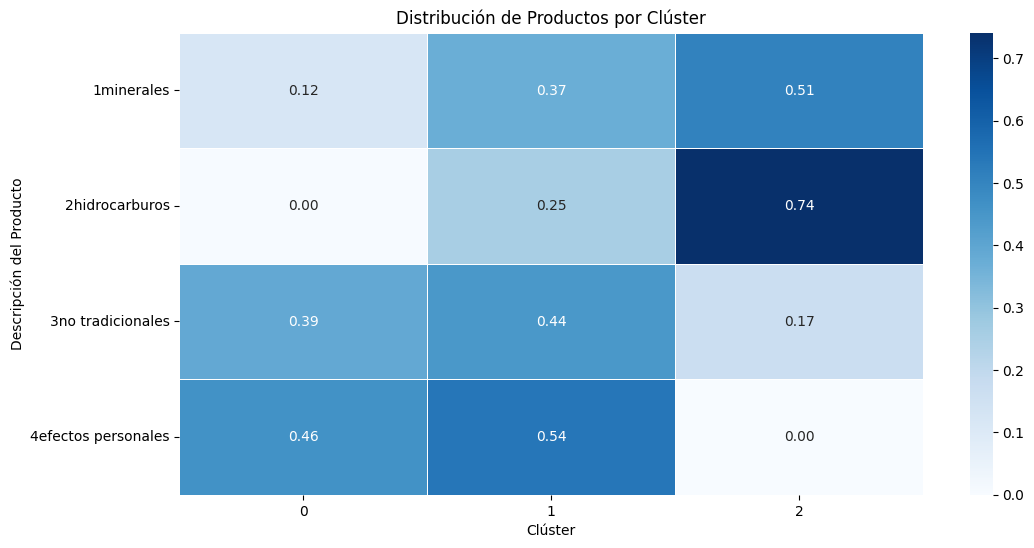

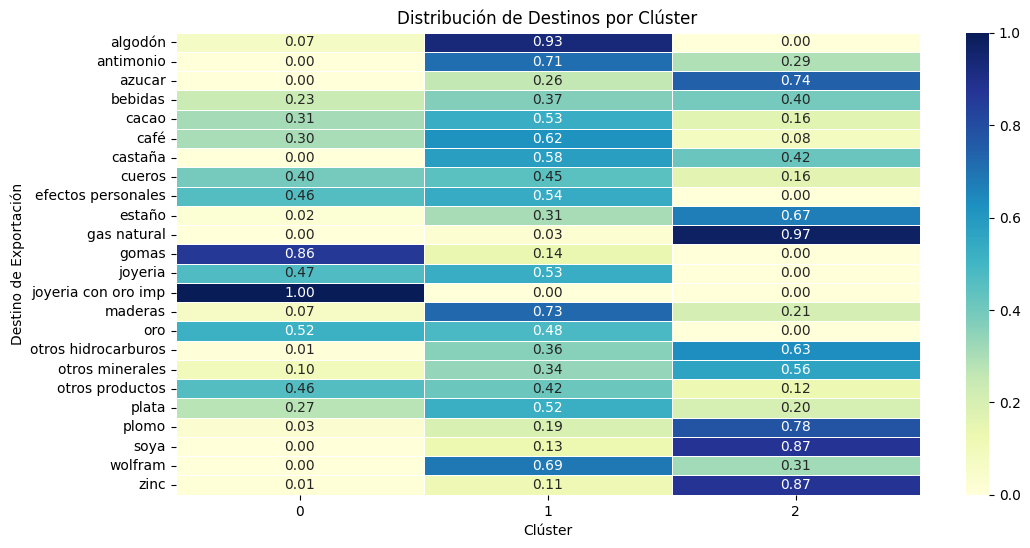

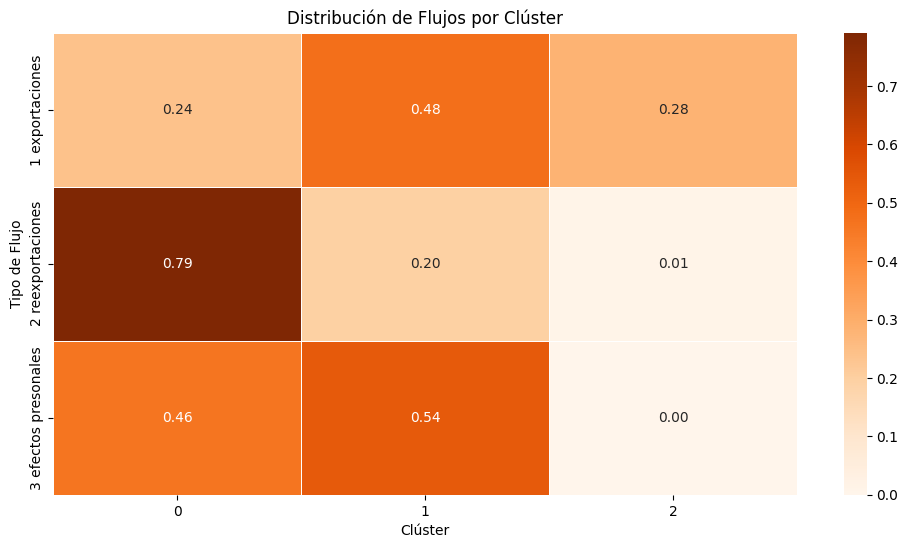

<ipython-input-25-8c82d206ea91>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='KILBRU', data=df_filtered, palette='Set2')


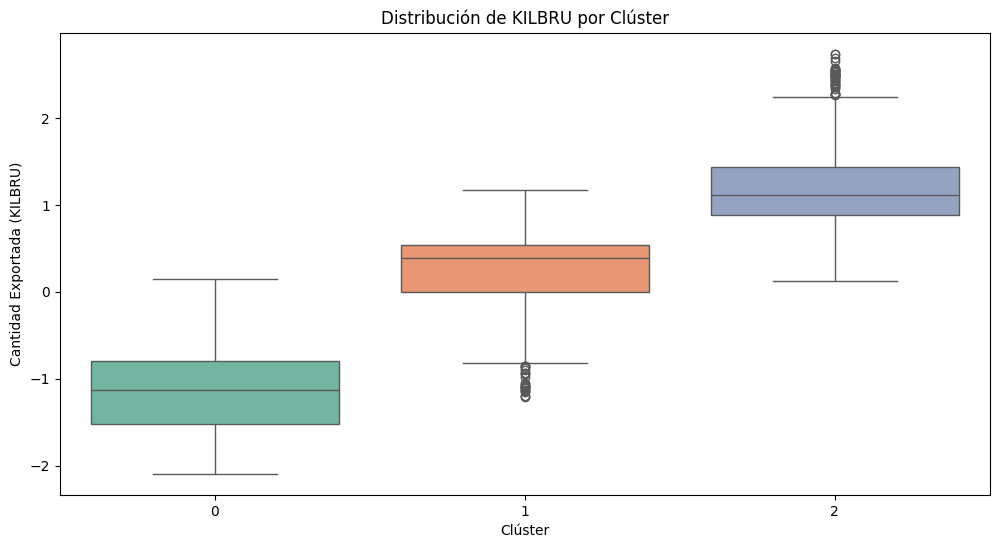

<ipython-input-25-8c82d206ea91>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='VALOR', data=df_filtered, palette='Set2')


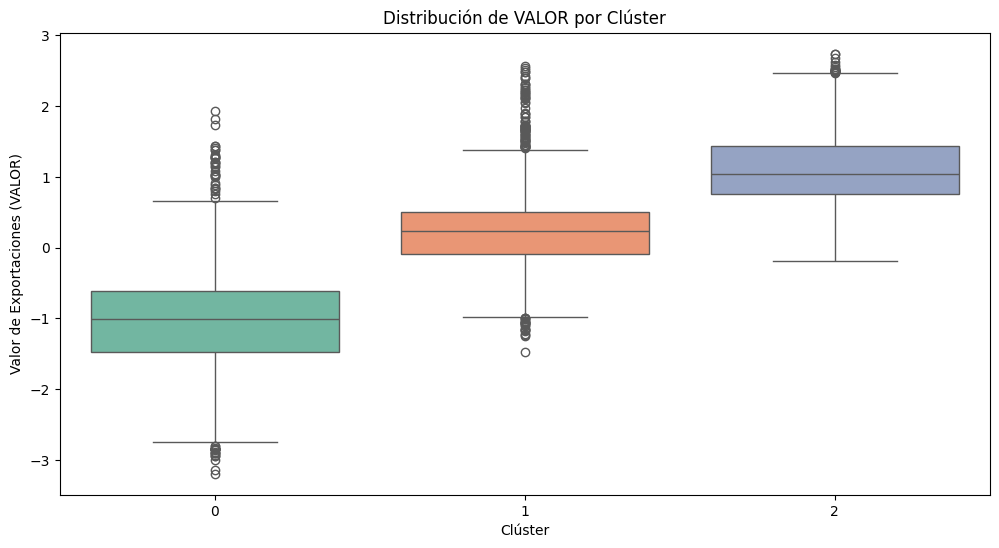

In [ ]:
# 1. Análisis de la distribución de características cualitativas por clúster
# Usar la columna 'Cluster' para agrupar las características cualitativas

# Analizar la distribución de los productos (DESNAN) por clúster
product_distribution = pd.crosstab(df_filtered['CLTNT'], df_filtered['Cluster'])
product_distribution = product_distribution.div(product_distribution.sum(axis=1), axis=0)  # Normalizar por fila

# Visualizar la distribución de productos por clúster
plt.figure(figsize=(12, 6))
sns.heatmap(product_distribution, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Distribución de Productos por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Descripción del Producto')
plt.show()

# 2. Analizar la distribución de los destinos (DESTNT) por clúster
destination_distribution = pd.crosstab(df_filtered['DESTNT'], df_filtered['Cluster'])
destination_distribution = destination_distribution.div(destination_distribution.sum(axis=1), axis=0)  # Normalizar por fila

# Visualizar la distribución de destinos por clúster
plt.figure(figsize=(12, 6))
sns.heatmap(destination_distribution, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Distribución de Destinos por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Destino de Exportación')
plt.show()

# 3. Analizar la distribución del flujo (FLUJO) por clúster
flow_distribution = pd.crosstab(df_filtered['FLUJO'], df_filtered['Cluster'])
flow_distribution = flow_distribution.div(flow_distribution.sum(axis=1), axis=0)  # Normalizar por fila

# Visualizar la distribución de los flujos por clúster
plt.figure(figsize=(12, 6))
sns.heatmap(flow_distribution, annot=True, cmap='Oranges', fmt=".2f", linewidths=0.5)
plt.title('Distribución de Flujos por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Tipo de Flujo')
plt.show()

# 4. Análisis de la relación de cantidad exportada (KILBRU) y valor con las variables cualitativas
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='KILBRU', data=df_filtered, palette='Set2')
plt.title('Distribución de KILBRU por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Cantidad Exportada (KILBRU)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='VALOR', data=df_filtered, palette='Set2')
plt.title('Distribución de VALOR por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Valor de Exportaciones (VALOR)')
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Evaluación del modelo K-means
inertia = kmeans.inertia_  # Inercia (dentro de los clusters)
sil_score = silhouette_score(X_cluster, df_filtered['Cluster'])  # Silhouette score

# Mostrar los resultados
print(f'Inercia: {inertia}')
print(f'Silhouette Score: {sil_score}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Archivo guardado en: /content/drive/My Drive/dataset_filtrado.csv
Inercia: 6675.377030264522
Silhouette Score: 0.44003452358402667


In [ ]:
# Selección de columnas relevantes

selected_cluster_data = df_filtered[df_filtered['Cluster'] == 1]
selected_columns = ['DESPAIS', 'DESACT2']
filtered_dataset = dataset[selected_columns].dropna().drop_duplicates()


# Agrupación por país: Lista de productos exportados por país

grouped_data = filtered_dataset.groupby('DESPAIS')['DESACT2'].apply(list)


# Crear una lista de transacciones (listas de productos exportados)
transactions = filtered_dataset.groupby('DESPAIS')['DESACT2'].apply(list).tolist()

print(transactions)

# Convertir al formato transaccional usando TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)

# Aplicar FP-Growth para encontrar patrones frecuentes
frequent_itemsets = fpgrowth(transaction_df, min_support=0.2, use_colnames=True)

# Generar reglas de asociación
rules = association_rules(frequent_itemsets, num_itemsets=len(frequent_itemsets), metric="lift", min_threshold=1.0)
#rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)


# Mostrar las reglas de asociación
print("Reglas de Asociación:")
print(rules)

[['efectos personales', 'otras manufacturas'], ['prendas de vestir  adobo y tenido de pieles', 'productos textiles', 'productos alimenticios', 'efectos personales', 'otras manufacturas', 'maderas y manufacturas de madera', 'cataña', 'cafe sin tostar', 'otros productos agropecuarios', 'quinua', 'chia', 'cacao en grano', 'cacao', 'mineral de antimonio', 'manies', 'semillas de sesamoajonjoli', 'cueros y manufacturas de cuero', 'bebidas', 'productos de galleteria y panaderia', 'otras minas y canteras', 'otros metales manufacturados'], ['semillas y habas de soya', 'productos derivados de soya', 'maiz', 'otros productos agropecuarios', 'efectos personales', 'otras manufacturas'], ['cafe sin tostar', 'efectos personales', 'otros productos agropecuarios', 'otras manufacturas'], ['otras manufacturas'], ['cueros y manufacturas de cuero', 'otras manufacturas', 'cacao en grano', 'sulfato de bario natural', 'boratos', 'cloruro de potasio', 'antimonio metálico y óxidos de antimonio', 'sustancias y p

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 1. Selección de columnas relevantes para la clusterización y análisis de reglas
selected_cluster_data = df_filtered[df_filtered['Cluster'] == 1]
selected_columns = ['DESPAIS', 'DESACT2', 'KILBRU', 'VALOR']  # Ajusta según lo que sea relevante para tu análisis
filtered_dataset = df_cleaned[selected_columns].dropna().drop_duplicates()

# 2. Agrupación por país: Lista de productos exportados por país
grouped_data = filtered_dataset.groupby('DESPAIS')['DESACT2'].apply(list)

# 3. Crear la lista de transacciones (listas de productos exportados por país)
transactions = grouped_data.tolist()

# 4. Convertir las transacciones a formato transaccional usando TransactionEncoder
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)

# 5. Aplicar Apriori para encontrar itemsets frecuentes
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(transaction_df, min_support=0.2, use_colnames=True)

# 6. Generar reglas de asociación
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=len(frequent_itemsets))

# 7. Mostrar las reglas de asociación
rules['antecedents'] = rules['antecedents'].apply(lambda x: [item for item in x])
rules['consequents'] = rules['consequents'].apply(lambda x: [item for item in x])

# Agregar país correspondiente a las reglas
rules['DESPAIS'] = rules['antecedents'].apply(lambda x: grouped_data[grouped_data.apply(lambda x: any(product in x for product in x))].index[0])

# Mostrar las reglas de asociación con los productos antecedente y consecuente, junto con los países
print("Reglas de Asociación con Países:")
print(rules[['DESPAIS', 'antecedents', 'consequents', 'support', 'lift']])


Reglas de Asociación con Países:
    DESPAIS                                   antecedents  \
0   albania                          [otras manufacturas]   
1   albania                             [cafe sin tostar]   
2   albania                                      [cataña]   
3   albania                          [otras manufacturas]   
4   albania                      [productos alimenticios]   
..      ...                                           ...   
57  albania  [productos alimenticios, otras manufacturas]   
58  albania                  [quinua, otras manufacturas]   
59  albania                      [productos alimenticios]   
60  albania                                      [quinua]   
61  albania                          [otras manufacturas]   

                                     consequents   support      lift  
0                              [cafe sin tostar]  0.218182  1.303704  
1                           [otras manufacturas]  0.218182  1.303704  
2                    

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
output_path = '/content/drive/My Drive/reglas_asociacionMonografia.xlsx'
rules.to_excel(output_path, index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Identificar productos no tradicionales en el dataset
productos_no_tradicionales = [
    'quinua',
    'cataña',
    'chía',
    'productos alimenticios',
    'productos textiles',
    'prendas de vestir, adobo y teñido de pieles',
    'maderas y manufacturas de madera',
    'otros metales manufacturados',
    'otras manufacturas'
]

# Filtrar reglas que cumplan criterios estrictos y que incluyan productos no tradicionales
reglas_significativas = rules[
    (rules['lift'] > 1.46) &                  # Lift elevado
    (rules['confidence'] >= 0.98) &         # Confianza muy alta
    (rules['certainty'] >= 0.98) &          # Alta certeza
    (rules['support'] > 0.15)               # Soporte significativo
]

# Filtrar reglas relevantes para productos no tradicionales
reglas_relevantes = reglas_significativas[
    reglas_significativas['antecedents'].apply(
        lambda x: any(item in str(x) for item in productos_no_tradicionales)
    ) |
    reglas_significativas['consequents'].apply(
        lambda x: any(item in str(x) for item in productos_no_tradicionales)
    )
]

# Mostrar las reglas filtradas
print("Reglas de Filtradas:")
print(reglas_relevantes)


Reglas de Filtradas:
                                          antecedents           consequents  \
8                                              [chia]  [otras manufacturas]   
20                     [otros metales manufacturados]  [otras manufacturas]   
24      [prendas de vestir  adobo y tenido de pieles]  [otras manufacturas]   
28                               [productos textiles]  [otras manufacturas]   
38                   [productos alimenticios, cataña]  [otras manufacturas]   
44  [productos textiles, maderas y manufacturas de...  [otras manufacturas]   
50  [productos textiles, prendas de vestir  adobo ...  [otras manufacturas]   
56                   [productos alimenticios, quinua]  [otras manufacturas]   

    antecedent support  consequent support   support  confidence      lift  \
8             0.218182            0.681818  0.218182         1.0  1.466667   
20            0.263636            0.681818  0.263636         1.0  1.466667   
24            0.254545           

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Identificar productos no tradicionales en el dataset
productos_no_tradicionales = [
    'quinua',
    'cataña',
    'chía',
    'productos alimenticios',
    'productos textiles',
    'prendas de vestir, adobo y teñido de pieles',
    'maderas y manufacturas de madera',
    'otros metales manufacturados',
    'otras manufacturas'
]

# Filtrar reglas que cumplan criterios estrictos y que incluyan productos no tradicionales
reglas_significativas = rules[
    (rules['lift'] > 1.3) &                  # Lift elevado
    (rules['confidence'] >= 0.98) &          # Confianza muy alta
    (rules['support'] > 0.15)                # Soporte significativo
]

# Filtrar reglas relevantes para productos no tradicionales
reglas_relevantes = reglas_significativas[
    reglas_significativas['antecedents'].apply(
        lambda x: any(item in str(x) for item in productos_no_tradicionales)
    ) |
    reglas_significativas['consequents'].apply(
        lambda x: any(item in str(x) for item in productos_no_tradicionales)
    )
]

# Agregar la columna de 'DESPAIS' (país) a las reglas relevantes
def obtener_pais(antecedente_o_consecuente):
    """
    Función que obtiene el país del antecedente o consecuente en la regla.
    """
    for producto in productos_no_tradicionales:
        if producto in str(antecedente_o_consecuente):
            pais = reglas_significativas.loc[
                reglas_significativas['antecedents'].apply(
                    lambda x: producto in str(x)
                ) | reglas_significativas['consequents'].apply(
                    lambda x: producto in str(x)
                ), 'DESPAIS'
            ].values
            if pais.size > 0:
                return pais[0]
    return 'Desconocido'  # Si no encuentra el país, retorna 'Desconocido'

# Añadir la columna de país a las reglas relevantes
reglas_relevantes['Pais'] = reglas_relevantes['antecedents'].apply(obtener_pais)

# Mostrar las reglas filtradas junto con el país
print("Reglas Filtradas por Productos No Tradicionales y País:")
print(reglas_relevantes[['Pais', 'antecedents', 'consequents', 'support', 'lift']])


Reglas Filtradas por Productos No Tradicionales y País:
           Pais                                        antecedents  \
8   Desconocido                                             [chia]   
20      albania                     [otros metales manufacturados]   
24  Desconocido      [prendas de vestir  adobo y tenido de pieles]   
28      albania                               [productos textiles]   
38      albania                   [productos alimenticios, cataña]   
44      albania  [productos textiles, maderas y manufacturas de...   
50      albania  [productos textiles, prendas de vestir  adobo ...   
56      albania                   [productos alimenticios, quinua]   

             consequents   support      lift  
8   [otras manufacturas]  0.218182  1.466667  
20  [otras manufacturas]  0.263636  1.466667  
24  [otras manufacturas]  0.254545  1.466667  
28  [otras manufacturas]  0.272727  1.466667  
38  [otras manufacturas]  0.200000  1.466667  
44  [otras manufacturas]  0.200

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
output_path = '/content/drive/My Drive/reglas_filtradasMonografia.xlsx'
reglas_relevantes.to_excel(output_path, index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
